In [ ]:
!pip install matplotlib

In [ ]:
!pip install opencv-python-headless numpy

In [11]:
#connect drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd '/content/gdrive/MyDrive/Thesis/Demo_code/rex'

/content/gdrive/MyDrive/Thesis/Demo_code/rex


In [ ]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.4/783.4 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.9/298.9 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from tensorflow import keras
import shutil

In [8]:
from skimage.filters import threshold_otsu
from sklearn.cluster import KMeans
from itertools import combinations
from collections import defaultdict
import itertools
import functools

In [9]:
from page_extractor import PageExtractor
from hough_line_corner_detector import HoughLineCornerDetector
from processors import Resizer, OtsuThresholder, FastDenoiser

ModuleNotFoundError: No module named 'page_extractor'

In [ ]:
path = '/content/gdrive/MyDrive/Thesis/OCR_Implementation'

In [ ]:
def showImage(image_path):
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [ ]:
#verify images (human)
from PIL import Image
import matplotlib.pyplot as plt

files = os.listdir(path)
for file_name in files:
  if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
    image_path = path+"/"+file_name
    showImage(image_path)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def fix_image_orientation(img_path):
    page_extractor = PageExtractor(
        preprocessors = [
            Resizer(height = 1280, output_process = True),
            FastDenoiser(strength = 9, output_process = True),
            OtsuThresholder(output_process = True)
        ],
        corner_detector = HoughLineCornerDetector(
            rho_acc = 1,
            theta_acc = 180,
            thresh = 100,
            output_process = True
        )
    )
    extracted = page_extractor(img_path)
    correct_image=cv2.resize(extracted, (1500, 2000))
    return correct_image

In [ ]:
def detectName(correct_image):
  cropped_name = correct_image[350:420,380:900]
  return cropped_name

In [ ]:
def detectId(correct_image):
  cropped_id = correct_image[350:415,1045:1360]
  return cropped_id

[310:376,1055:1375]


In [ ]:
def detectSection(correct_image):
  cropped_section = correct_image[495:560,1035:1360]
  return cropped_section

[455:523,1040:1375]



In [ ]:
def detectGrades(correct_image):
  cropped_grades=[]
  y_start=770
  y_end=815
  x_start=400
  x_end=558
  h=10
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  y_start+=45
  y_end+=45
  cropped_grades.append(correct_image[y_start-h:y_end-h, x_start-h:x_end-h])
  return cropped_grades


  y_start=750
  y_end=799
  x_start=387
  x_end=549
  y_start+=50

In [ ]:
#test
img = fix_image_orientation(path+'/1704270139703.jpg')
#cv2_imshow(img)
#img=img[350:420,380:900]
img=detectId(img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
def remove_lines_and_dots(image, min_size_threshold=1, max_size_threshold=5, min_width_threshold=5, max_width_threshold=20):
    # Convert the image to grayscale
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to binarize the image
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # used to send

    # Find horizontal lines using a kernel
    kernel = np.ones((1, 5), np.uint8)
    lines = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

    # Find contours of the lines and dots
    contours, _ = cv2.findContours(lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Remove horizontal lines and small dots based on the size thresholds
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        #print("w",w," h",h)
        if  min_width_threshold < w < max_width_threshold :
            image[y:y+h, x:x+w] = 0 # Set the region to black
        if  h >= max_size_threshold:
            image[y:y+h, x:x+w] = 255 # Set the region to white

    #cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return image

def segment_and_save_digits(img, output_folder): #PASS IMG HERE
    # Read the input image
    original_image = img.copy()

    # Remove horizontal lines from each digit
    cleaned_original_image = remove_lines_and_dots(original_image)

    # Convert the cleaned image to grayscale
    gray_image = cleaned_original_image.copy()  # gray_image = cv2.cvtColor(cleaned_original_image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to binarize the image
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours based on x-coordinate
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Collect information about each segmented digit's size
    digit_sizes = []

    # Iterate through the contours
    for idx, contour in enumerate(contours):
        # Get bounding box for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Extract each digit from the original image
        digit = cleaned_original_image[y:y + h, x:x + w]

        # Save each digit as a separate image
        digit_path = os.path.join(output_folder, f'digit_{idx + 1}.png')
        cv2.imwrite(digit_path, digit)

        # Append the size of the digit to the list
        digit_sizes.append((w, h))

        # Draw a rectangle around the digit on the original image
        cv2.rectangle(cleaned_original_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the result
    #cv2_imshow(cleaned_original_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Return the list of digit sizes
    return digit_sizes

def get_image_size(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            return width, height
    except Exception as e:
        #print(f"Error: {e}")
        return None

def is_low_pixel_count(image_path, threshold):
    # Read the image
    image = cv2.imread(image_path)

    # Get the total number of pixels in the image
    total_pixels = image.size

    # Print the pixel count and image name
    #print(f"Image: {os.path.basename(image_path)}, Pixel Count: {total_pixels}")

    # Set a threshold for low pixel count (adjust as needed)
    if total_pixels < threshold:
        return True
    else:
        return False

def filter_images_by_pixel_count(folder_path, output_folder, threshold):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all files in the folder
    i=0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Construct the full path to the image
            image_path = os.path.join(folder_path, filename)

            # Check if the image has a low pixel count
            if is_low_pixel_count(image_path, threshold):
                #print(f"Removing image: {filename}")
                continue  # Skip this image

            # Copy the image to the output folder #str(i)+".jpg"
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, cv2.imread(image_path))

def extract_region(image_path, target_width, target_height):
    try:
        with Image.open(image_path) as img:
            width, height = img.size

            # Define the crop coordinates
            crop_width = 7
            crop_height = height
            crop_left = width - crop_width
            crop_right = width

            # Crop the right 7x21 pixels
            cropped_image = img.crop((crop_left, 0, crop_right, crop_height))

            # Save the cropped image
            cropped_image.save('digit_ex1.png')

            # Save the remaining part of the image
            remaining_image = img.crop((0, 0, crop_left, crop_height))
            remaining_image.save('digit_ex2.png')

            #print("Cropped and saved successfully.")
    except Exception as e:
        print(f"Error: {e}")

In [ ]:
def segmentation(img):
  output_folder = '/content/gdrive/MyDrive/Thesis/OCR_Implementation/Processed_Image/digit'
  digit_sizes = segment_and_save_digits(img, output_folder)

  # Display the sizes of each segmented digit
  #for idx, size in enumerate(digit_sizes):
  #    print(f"Digit {idx + 1} Size: {size[0]} x {size[1]} pixels")

  # # Example usage
  input_folder = '/content/gdrive/MyDrive/Thesis/OCR_Implementation/Processed_Image/digit'
  output_folder = '/content/gdrive/MyDrive/Thesis/OCR_Implementation/Processed_Image/digit_cleaned'
  pixel_count_threshold = 1000 # Adjust as needed

  filter_images_by_pixel_count(input_folder, output_folder, pixel_count_threshold)

  segmented_images=[]
  path = '/content/gdrive/MyDrive/Thesis/OCR_Implementation/Processed_Image/digit_cleaned'
  files = os.listdir(path)
  for file_name in files:
    tmpImg=cv2.imread(path+'/'+file_name)
    segmented_images.append(tmpImg)
  try:
      shutil.rmtree('/content/gdrive/MyDrive/Thesis/OCR_Implementation/Processed_Image')
  except Exception as e:
      print(f'Failed to delete directory: {e}')
  return segmented_images

In [ ]:
def preprocess_input(img): #thing for later
  img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  alpha = 1.9  # Contrast control (1.0-3.0)
  img = np.clip(alpha * img, 0, 255).astype(np.uint8)
  img_resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
  img_resized = cv2.bitwise_not(img_resized)

  arr = np.array([img_resized])
  arr = arr.reshape(arr.shape[0], 28, 28, 1).astype('float32') / 255
  return arr

In [ ]:
def prediction(img):
  model=load_model('/content/gdrive/MyDrive/Thesis/Models_compiled/mnist_model.h5')
  input_data=preprocess_input(img)
  predictions = model.predict(input_data)
  result=np.argmax(predictions)
  return str(result)

In [ ]:
def predictedString(img):
  segmented_images=segmentation(img)
  s = ""
  for i in segmented_images:
      s += prediction(i)
  return s


In [ ]:
def getLetter(prediction):
  letter="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  return letter[prediction-1]

In [ ]:
def predictionName(img):
  model=load_model('/content/gdrive/MyDrive/Thesis/Models_compiled/emnist_model.h5')
  input_data=preprocess_input(img)
  predictions = model.predict(input_data)
  result=np.argmax(predictions)
  return str(result)

In [ ]:
def predictName(img):
  segmented_images=segmentation(img)
  name = ""
  for i in segmented_images:
      prediction = predictionName(i)
      if int(prediction)<27:
        s=getLetter(int(prediction))
      else:
        s=""
      name += s
  return name

In [5]:
def initiate_database():
  file_path="/content/gdrive/MyDrive/Thesis/Demo_code/psudo_studuent_list.xlsx"
  data = pd.read_excel(file_path)
  data_dict = data.to_dict(orient='list')
  data_dict['Id'] = list(map(str, data_dict['Id']))
  data_dict['Section'] = list(map(str, data_dict['Section']))
  return data_dict

In [27]:
def verification(id,checked_scripts):
  student_list=initiate_database()
  if id in student_list["Id"] and id not in checked_scripts:
    return True
  else:
    return False

In [3]:
def closest_student(name,id):
  student_list = initiate_database()
  points = []
  for i in range (0,len(student_list["Name"])):
    points.append(0)
    j = 0
    while True:
        if name[j] == student_list["Name"][i][j]:
            points[i] += 1
        j += 1
        if j >= len(name) or j >= len(student_list["Name"][i]):
            break
    j=0
    while True:
        if id[j] == student_list["Id"][i][j]:
            points[i] += 1
        j += 1
        if j >= len(id) or j >= len(student_list["Id"][i]):
            break
  index = points.index(max(points))
  correct_id = student_list["Id"][index]
  return correct_id

In [17]:
def crossChecker(id,name):
    student_list=initiate_database()
    name=name.upper()
    for i in range (0,len(student_list["Name"])):
        if name==student_list["Name"][i].upper():
            correct_id=student_list["Id"][i]
            return correct_id
    correct_id=closest_student(name,id)
    return correct_id

In [31]:
#verification test
all_student_id=[""]
id='20101068'
name='Md Fud Islm'
correct_id=''
if (verification(id,all_student_id)):
  pass
else:
  correct_id = crossChecker(id,name)
print(correct_id)

1
20101060


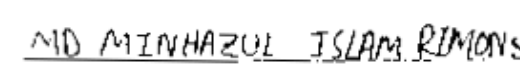

1/1 [==============================] - 0s 103ms/step
Re-check: 20101060
1/1 [==============================] - 0s 103ms/step


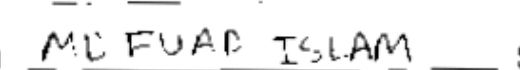

1/1 [==============================] - 0s 74ms/step
Re-check: 20101192
1/1 [==============================] - 0s 94ms/step


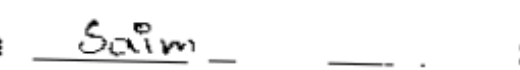

1/1 [==============================] - 0s 69ms/step
Re-check: 20101190
1/1 [==============================] - 0s 95ms/step


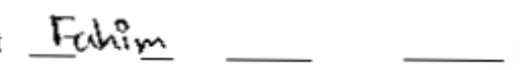

1/1 [==============================] - 0s 65ms/step
Re-check: 20101189
1/1 [==============================] - 0s 66ms/step


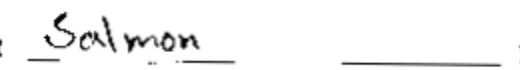

1/1 [==============================] - 0s 62ms/step
Re-check: 20101060
1/1 [==============================] - 0s 64ms/step


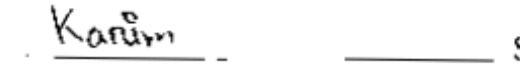

1/1 [==============================] - 0s 82ms/step
Re-check: 20101060
1/1 [==============================] - 0s 65ms/step


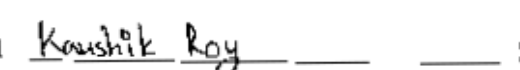

1/1 [==============================] - 0s 64ms/step
Re-check: 20101060
1/1 [==============================] - 0s 70ms/step


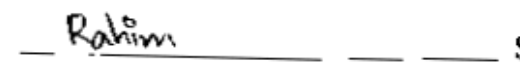

1/1 [==============================] - 0s 69ms/step
Re-check: 20101190
1/1 [==============================] - 0s 64ms/step


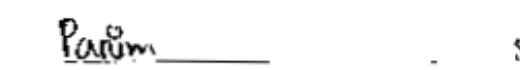

1/1 [==============================] - 0s 104ms/step
Re-check: 20101190
1/1 [==============================] - 0s 65ms/step


In [ ]:
all_student_grades=[]
all_student_id=[]
all_student_section=[]

files = os.listdir(path)
for file_name in files:
  if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
    image_path = path+'/'+file_name

    correct_image = fix_image_orientation(image_path)

    cropped_name=detectName(correct_image)
    cv2_imshow(cropped_name)
    cropped_id = detectId(correct_image)
    cropped_section = detectSection(correct_image)
    cropped_grades = detectGrades(correct_image)

    name=predictName(cropped_name)
    id = predictedString(cropped_id)
    if (verification(id,all_student_id)):
      section = predictedString(cropped_section)
      grades=[]
      for i in cropped_grades:
        grades.append(predictedString(i))

      all_student_grades.append(grades)
      all_student_id.append(id)
      all_student_section.append(section)
    else:
      correct_id= crossChecker(id,name)
      print("Re-check:",correct_id)
      file_path="/content/gdrive/MyDrive/Thesis/Improvement_dataset/"+str(correct_id)+'.jpg'
      image=cropped_id
      cv2.imwrite(file_path,image)

      section = predictedString(cropped_section)
      grades=[]
      for i in cropped_grades:
        grades.append(predictedString(i))

      all_student_grades.append(grades)
      all_student_id.append(correct_id)
      all_student_section.append(section)

tf.keras.backend.clear_session()

In [ ]:
print(all_student_id)
print(all_student_section)
print(all_student_grades)

['20101060', '20101192', '20101190', '20101189', '20101060', '20101060', '20101060', '20101190', '20101190']
['35', '12', '33', '33', '32', '33', '2', '53', '733']
[['7', '7', '', '', '', '', '', '', '1', '', '51'], ['22', '3', '2', '2', '1', '', '71', '', '7', '5', '122'], ['5', '57', '12', '7', '', '', '', '', '', '', '5'], ['5', '1', '3', '1', '1', '1', '1', '1', '1', '1', '1'], ['15', '1', '37', '1', '1', '1', '1', '1', '1', '1', '4'], ['2', '3', '2', '', '', '', '', '1', '1', '65', '5'], ['215', '13', '1', '1', '1', '1', '1', '1', '1', '1', '52'], ['', '', '', '', '', '3', '5', '1', '1', '1', '5723'], ['12', '14', '12', '1', '1', '1', '1', '1', '1', '1', '733']]


In [ ]:
import csv

# Data to be written into the CSV file
data = [['Section', 'Id', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','Total']]

for i in range(0,len(all_student_id)):
  data.append([all_student_section[i],all_student_id[i],all_student_grades[i][0],
              all_student_grades[i][1],all_student_grades[i][2],all_student_grades[i][3],
              all_student_grades[i][4],all_student_grades[i][5],all_student_grades[i][6],
              all_student_grades[i][7],all_student_grades[i][8],all_student_grades[i][9],
              all_student_grades[i][10]])

# Specify the file path
result_file_path = '/content/gdrive/MyDrive/Thesis/OCR_Implementation/Result/grade.csv' # Replace with your desired file path

# Writing data to the CSV file
with open(result_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f'CSV file has been created at: {result_file_path}')


CSV file has been created at: /content/gdrive/MyDrive/Thesis/OCR_Implementation/Result/grade.csv
